In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
X = pd.read_csv('data/X.csv', index_col = 0)
Y = pd.read_csv('data/Y.csv', index_col = 0)
feature_50 = pd.read_csv('data/feature_50.csv', index_col = 0)

In [ ]:
X.shape

In [ ]:
full_df = pd.concat([X,Y], axis = 1)

In [ ]:
full_df.shape

In [ ]:
joined_df = full_df.merge(feature_50, how = 'inner', on = 'srch_destination_id')

In [ ]:
joined_df.columns

In [ ]:
Y = joined_df.pop('is_booking')

In [ ]:
joined_df.shape

In [ ]:
Y.shape

In [ ]:
import gc

In [ ]:
gc.collect()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(joined_df, Y, 
                                                test_size = 0.2, 
                                                random_state = 42, 
                                                stratify = Y)

In [ ]:
X_train.columns

In [ ]:
len(y_train[y_train == 1])/len(y_train)

In [ ]:
len(y_test[y_test == 1])/len(y_test)

In [ ]:
del joined_df
del Y
gc.collect()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(replacement = False, random_state = 42)

In [ ]:
X_train_subsample, y_train_subsample = rus.fit_resample(X_train, y_train)

In [ ]:
print("shape of train features:")
print(X_train_subsample.shape)
print(f'there are {y_train_subsample.value_counts()[1]} positive labels and {y_train_subsample.value_counts()[0]} negative labels')

In [ ]:
X_train_subsample.to_csv('X_train_subsample.csv')
y_train_subsample.to_csv('y_train_subsample.csv')

In [ ]:
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [ ]:
X_train_subsample.isnull().sum().sum()

In [ ]:
del X_train
del y_train
gc.collect()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression().fit(X_train_subsample,y_train_subsample)

In [66]:
lr.score(X_train_subsample,y_train_subsample)

0.5936873311575367

In [67]:
lr.score(X_test,y_test)

0.6165106630642561

C:\Users\jy3178\.conda\envs\sklearn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


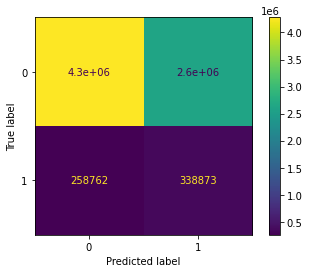

In [76]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In order to test the accuracy, we need to find the hotels that the user actually booked, i.e: is_booking == 1

In [107]:
test_df = pd.concat([X_test,y_test], axis = 1)

In [108]:
booked_df = test_df[test_df.is_booking == 1]

In [109]:
booked_df.is_booking.unique()

array([1], dtype=int64)

In [110]:
#since all of them are booked, we don't need is_booking anymore
booked_df.pop('is_booking')

2551576     1
25258460    1
21926657    1
33793896    1
34189250    1
           ..
5671470     1
6573088     1
26971676    1
16316081    1
35470461    1
Name: is_booking, Length: 597635, dtype: int64

In [111]:
cluster_index = X_test.columns.get_loc('hotel_cluster')

In [112]:
Y = booked_df.pop('hotel_cluster')
X = booked_df

In [113]:
X.shape

(597635, 78)

In [114]:
X.columns

Index(['site_name', 'user_location_country', 'user_location_region',
       'user_location_city', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'imputed_distance',
       'srch_before_ci', 'srch_trip_duration', 'encoded_day_of_year_srch',
       'srch_destination_type_id_0', 'srch_destination_type_id_1',
       'srch_destination_type_id_2', 'srch_destination_type_id_3',
       'srch_destination_type_id_4', 'srch_destination_type_id_5',
       'srch_destination_type_id_6', 'srch_destination_type_id_7',
       'srch_destination_type_id_8', 'srch_destination_type_id_9', 'd1', 'd2',
       'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13',
       'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23',
       'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33',
       'd34', 'd35', 'd36', 'd37', 'd38', 'd39', 'd40

In [125]:
X.insert(cluster_index, column = 'hotel_cluster', value = 0)

In [ ]:
X['hotel_cluster'] = 1

In [130]:
X.hotel_cluster

2551576     1
25258460    1
21926657    1
33793896    1
34189250    1
           ..
5671470     1
6573088     1
26971676    1
16316081    1
35470461    1
Name: hotel_cluster, Length: 597635, dtype: int64

In [ ]:
book_prob = pd.DataFrame(index = X.index)
for h in range(100):
        X.loc[:,'hotel_cluster'] = h
        book_prob[h] = lr.predict_proba(X)[:,1]

In [132]:
book_prob.shape

(597635, 100)

In [134]:
Y.shape

(597635,)

In [140]:
top_5 = book_prob.apply(lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=5)

In [147]:
top_5['Y'] = Y

In [148]:
top_5

,0,1,2,3,4,Y
2551576,99,98,97,96,95,98
25258460,99,98,97,96,95,64
21926657,99,98,97,96,95,42
33793896,99,98,97,96,95,18
34189250,99,98,97,96,95,25
...,...,...,...,...,...,...
5671470,99,98,97,96,95,64
6573088,99,98,97,96,95,99
26971676,99,98,97,96,95,64
16316081,99,98,97,96,95,90


In [157]:
top_5['accurate'] = top_5.apply(lambda x: x['Y'] in x[:5].values, axis = 1)

In [159]:
top_5.head(5)

,0,1,2,3,4,Y,accurate
2551576,99,98,97,96,95,98,True
25258460,99,98,97,96,95,64,False
21926657,99,98,97,96,95,42,False
33793896,99,98,97,96,95,18,False
34189250,99,98,97,96,95,25,False


In [162]:
len(top_5[top_5.accurate])/len(top_5)

0.06304349644850117